In [411]:
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd 

In [412]:
x , y = make_regression(n_samples = 100 , n_features = 1 , n_informative=1  , n_targets =1 , noise = 20 , random_state = 42  )

In [413]:
df  = pd.DataFrame({
    'one' : x[: , 0] , 
    'target' : y , 
})

In [414]:
# import plotly.express as px 
# fig = px.scatter_3d(df , x = 'one' , y = 'two'  , z = 'target')
# fig.show()


In [415]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42)

In [416]:
x_train.ravel()

array([ 0.34361829, -1.01283112, -0.60063869,  1.52302986,  0.76743473,
        0.09176078,  0.36139561, -1.42474819,  1.0035329 , -1.47852199,
        1.53803657, -0.64511975, -0.11564828, -0.60170661, -0.50175704,
        0.64768854, -1.72491783,  0.96864499,  0.19686124, -1.95967012,
        0.2088636 , -0.90802408,  0.54256004,  1.85227818, -0.03582604,
       -2.6197451 ,  0.11092259,  1.46564877, -1.10633497, -0.21967189,
        1.56464366,  0.31424733,  0.51326743,  0.82254491,  0.61167629,
        0.29612028, -0.46341769, -1.46351495, -0.29900735, -0.1382643 ,
        0.33126343, -0.30921238, -0.38508228, -0.51827022, -0.32766215,
       -1.91328024, -0.3011037 , -0.56228753, -0.2257763 , -0.71984421,
       -0.54438272, -0.676922  , -0.23458713,  0.32875111, -0.07201012,
       -0.18565898,  1.57921282,  0.26105527, -0.46063877, -1.98756891,
       -0.70205309,  1.05712223,  0.36163603, -1.19620662,  0.08704707,
       -0.23413696,  0.09707755, -1.05771093,  0.91540212, -0.01

In [417]:
y_train

array([ 3.52202177e+01, -3.27216034e+01,  3.03278631e+00,  6.02517239e+01,
        6.01127448e+01,  2.14036667e+01,  3.04845974e+01, -8.24664085e+01,
        2.27986221e+01, -6.94804227e+01,  8.95671291e+01, -4.95365695e+01,
        7.58367776e+00, -4.27287124e+01, -2.16344842e+01,  3.60939588e+01,
       -8.51836143e+01,  5.52391241e+01, -1.62402661e+01, -8.91095732e+01,
        8.90108319e+00, -4.93961082e+01, -1.08230392e+01,  7.88540285e+01,
        6.99430659e+00, -1.26703865e+02,  2.00928481e+01,  6.79742116e+01,
       -4.26829789e+01,  1.50182931e+01,  8.41206595e+01,  7.93645654e+00,
        1.86789111e+01,  6.84660288e+01,  2.14147070e+01, -6.16054619e+00,
       -4.07942011e+01, -6.79315585e+01, -2.79165108e+01, -1.15540412e+01,
        2.61801170e+01, -3.02497879e+01,  3.47094962e+01, -1.97578606e+01,
        1.86401737e+00, -8.85146082e+01, -1.57871471e+01, -2.33917541e+01,
       -9.57175421e+00, -4.77573368e+01, -3.82298560e+01, -3.47452883e+01,
       -7.94234764e+00,  

In [418]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


lr = LinearRegression()
lr.fit(x_train , y_train)
y_pred = lr.predict(x_test)
r2_score(y_test, y_pred)

0.8019015156159199

In [419]:
print(lr.coef_)
print(lr.intercept_)

[46.747264]
0.19844442845175525


In [420]:

class GDRegressor:
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
        self.coef = []
        self.intercept = []
        self.loss_history = []
        
    def fit(self,X,y):
        X = np.array(X)
        y = np.array(y) 
        
        plt.figure(figsize = (10,6))

        for i in range(self.epochs):
            y_pred = self.m * X.ravel() + self.b 

            loss_slope_b = -2 * np.sum(y - y_pred) / len(X)
            loss_slope_m = -2 * np.sum((y-y_pred)* X.ravel()) / len(X)

            self.coef.append(self.m)
            self.intercept.append(self.b)

            loss = np.mean((y-y_pred)**2)
            self.loss_history.append(loss)

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)

            if i % 2 == 0 : 
                plt.scatter(X , y , color = 'blue')
                plt.plot(X , self.m * X + self.b , alpha = 0.7)
                
        print(self.m,self.b)
        
    def predict(self,X):
        return self.m * X + self.b
    
    def plot_loss(self):
        """Plot loss reduction over epochs"""
        plt.figure(figsize=(8, 5))
        plt.plot(range(self.epochs), self.loss_history, color="red", linewidth=2)
        plt.xlabel("Epochs")
        plt.ylabel("Loss (MSE)")
        plt.title("Loss Reduction Over Time")
        plt.grid()
        plt.show()

46.91080139628756 -0.9200329510529812


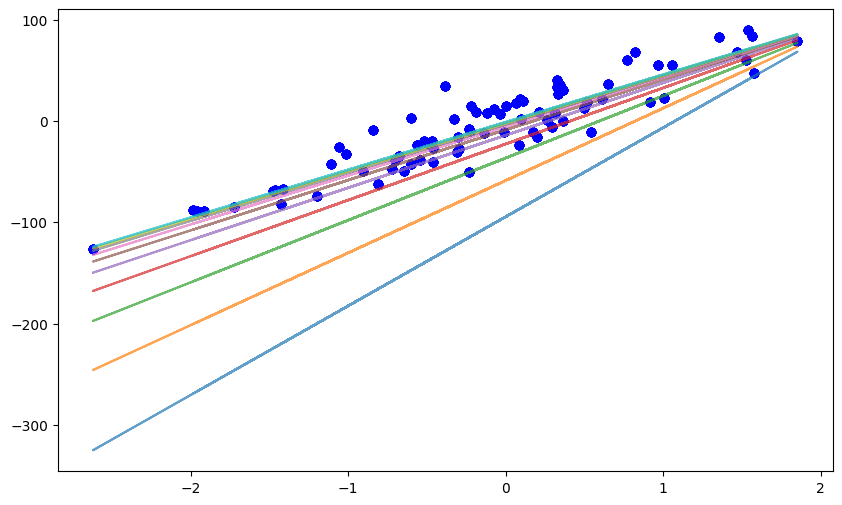

In [421]:
model = GDRegressor(0.1 , 20)
model.fit(x_train , y_train) 


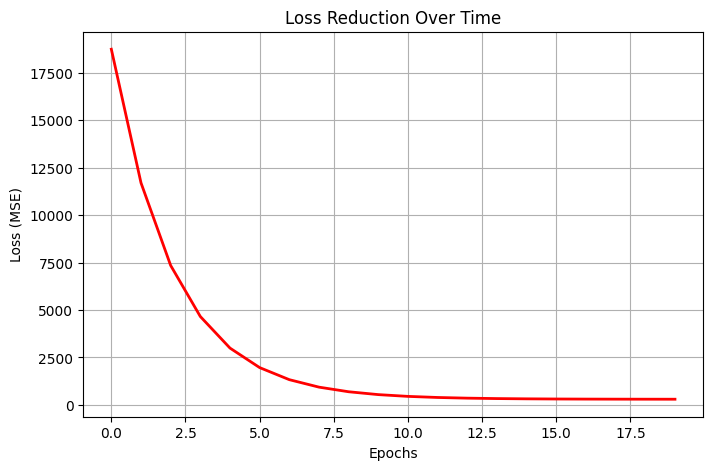

In [422]:
model.plot_loss()

In [423]:
from sklearn.metrics import r2_score
y_pref = model.predict(x_test)
r2_score(y_test,    y_pref)

0.7902529665263727

In [424]:
np.array(model.coef)

array([100.        ,  88.02093052,  78.69462226,  71.43971523,
        65.80135602,  61.42380378,  58.02894787,  55.3994647 ,
        53.36561427,  51.79489229,  50.583922  ,  49.65210265,
        48.93663533,  48.38862858,  47.97005047,  47.65134388,
        47.40956144,  47.2269075 ,  47.08959876,  46.9869744 ])

In [425]:
np.array(model.intercept)

array([-120.        ,  -94.5900709 ,  -74.57035972,  -58.79456498,
        -46.36060439,  -36.5585159 ,  -28.82948343,  -22.73361011,
        -17.92457039,  -14.12967139,  -11.13416827,   -8.76892511,
         -6.90070712,   -5.42454234,   -4.25771122,   -3.33501671,
         -2.6050617 ,   -2.02731897,   -1.56982464,   -1.20736225])